In [14]:
import numpy as np
from google.colab import drive
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.neighbors import  NearestNeighbors

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
ratings=pd.read_csv('/content/drive/MyDrive/ml-latest/ratings.csv')
print(ratings.values.shape)
ratings.head()

(27753444, 4)


userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264

In [12]:
movies=pd.read_csv('/content/drive/MyDrive/ml-latest/movies.csv')
print(movies.values.shape)
movies.head()


(58098, 3)


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [ ]:
# remove null entries
mask = (movies['movieId'] != None)&(movies['title'] != None)&(movies['genres'] != None)
movies=movies.loc[mask]
print(movies.values.shape) # turns out there is no null entries
movies.head()


In [61]:
# add another column of 'year' to movies
years = [None] * 58098
for x in range(0, 58098):
  years[x] = movies['title'][x][-5:-1]
years_int = [0] * 58098
for x in range(0, 58098):
  if years[x].isnumeric():
    years_int[x] = int(years[x])//10*10 # We decided only to keep the decade,
                                        # for better visualization
  else:
    years_int[x] = -1 # invalid entries

movies['year'] = years_int
movies.head()


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1990  
1                   Adventure|Children|Fantasy  1990  
2                               Comedy|Romance  1990  
3                         Comedy|Drama|Romance  1990  
4                                       Comedy  1990

In [8]:
gt=pd.read_csv('/content/drive/MyDrive/ml-latest/genome-tags.csv')
print(gt.values.shape)
gt.head()

(1128, 2)


tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

In [3]:
gs=pd.read_csv('/content/drive/MyDrive/ml-latest/genome-scores.csv')
print(gs.values.shape)
gs.head()

(14862528, 3)


movieId  tagId  relevance
0        1      1    0.02900
1        1      2    0.02375
2        1      3    0.05425
3        1      4    0.06875
4        1      5    0.16000

In [42]:
movie_tag_pivot=pd.pivot_table(columns='tagId',index='movieId',values='relevance',data=gs)
nn=NearestNeighbors()
nn.fit(movie_tag_pivot)

NearestNeighbors()

In [43]:
def recommendation(movie_id):
    distances,suggestions=nn.kneighbors(movie_tag_pivot.loc[movie_id,:].values.reshape(1,-1),n_neighbors=11)
    return movie_tag_pivot.iloc[suggestions[0]].index.to_list()

In [51]:
scores_movie=movies[movies['movieId'].isin(movie_tag_pivot.index.to_list())]

In [71]:
def wrap(movie_id):
  print("Input Movie:" + movies[movies['movieId'] == movie_id]['title'].values)
  recommendations=list(recommendation(movie_id))
  print("Recommended Movies:")
  for x in range(1,len(recommendations)):
    if recommendations[x] < 58098:
      rec = movies[movies['movieId'] == recommendations[x]]['title'].values
      print(rec)



In [76]:
wrap(1206)

['Input Movie:Clockwork Orange, A (1971)']
Recommended Movies:
['Lolita (1962)']
['Taxi Driver (1976)']
['Old Boy (2003)']
['Shining, The (1980)']
['American Psycho (2000)']
['Sympathy for Mr. Vengeance (Boksuneun naui geot) (2002)']
['Trainspotting (1996)']
['Requiem for a Dream (2000)']
['Straw Dogs (1971)']


In [94]:
#Action
action = movies[movies['genres'].str.contains('Action')]
print(action.values.shape)
action.reset_index(drop=True,inplace=True)
action.head()

(7130, 4)


movieId                    title                              genres  year
0        6              Heat (1995)               Action|Crime|Thriller  1990
1        9      Sudden Death (1995)                              Action  1990
2       10         GoldenEye (1995)           Action|Adventure|Thriller  1990
3       15  Cutthroat Island (1995)            Action|Adventure|Romance  1990
4       20       Money Train (1995)  Action|Comedy|Crime|Drama|Thriller  1990

In [95]:
action_data = {}
for x in range(0, 7130):
  if not action['year'][x] in action_data:
    action_data[action['year'][x]] = 1
  else:
    action_data[action['year'][x]] += 1
action_data = collections.OrderedDict(sorted(action_data.items()))
action_data.pop(-1)
print(action_data)

# number of action movies made each year in year:num_of_movies


OrderedDict([(1890, 2), (1900, 6), (1910, 8), (1920, 19), (1930, 91), (1940, 125), (1950, 208), (1960, 367), (1970, 761), (1980, 772), (1990, 1033), (2000, 1706), (2010, 1985)])


In [92]:
#Adventure
adventure = movies[movies['genres'].str.contains('Adventure')]
print(adventure.values.shape)
adventure.reset_index(drop=True,inplace=True)

adventure.head()

(4067, 4)


movieId                title                                       genres  \
0        1     Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        2       Jumanji (1995)                   Adventure|Children|Fantasy   
2        8  Tom and Huck (1995)                           Adventure|Children   
3       10     GoldenEye (1995)                    Action|Adventure|Thriller   
4       13         Balto (1995)                 Adventure|Animation|Children   

   year  
0  1990  
1  1990  
2  1990  
3  1990  
4  1990

In [93]:
adventure_data = {}
for x in range(0, 4067):
  if not adventure['year'][x] in adventure_data:
    adventure_data[adventure['year'][x]] = 1
  else:
    adventure_data[adventure['year'][x]] += 1
adventure_data = collections.OrderedDict(sorted(adventure_data.items()))
adventure_data.pop(-1)
print(adventure_data)

OrderedDict([(1900, 4), (1910, 16), (1920, 36), (1930, 132), (1940, 139), (1950, 277), (1960, 370), (1970, 330), (1980, 420), (1990, 498), (2000, 858), (2010, 965)])


In [90]:
#Animation
animation = movies[movies['genres'].str.contains('Animation')]
print(animation.values.shape)
animation.reset_index(drop=True,inplace=True)
animation.head()

(2663, 4)


movieId                    title  \
0        1         Toy Story (1995)   
1       13             Balto (1995)   
2       48        Pocahontas (1995)   
3      239    Goofy Movie, A (1995)   
4      244  Gumby: The Movie (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1990  
1                 Adventure|Animation|Children  1990  
2     Animation|Children|Drama|Musical|Romance  1990  
3            Animation|Children|Comedy|Romance  1990  
4                           Animation|Children  1990

In [91]:
animation_data = {}
for x in range(0, 2663):
  if not animation['year'][x] in animation_data:
    animation_data[animation['year'][x]] = 1
  else:
    animation_data[animation['year'][x]] += 1
animation_data = collections.OrderedDict(sorted(animation_data.items()))
animation_data.pop(-1)
print(animation_data)

OrderedDict([(1890, 1), (1900, 5), (1910, 7), (1920, 19), (1930, 138), (1940, 164), (1950, 125), (1960, 83), (1970, 139), (1980, 241), (1990, 301), (2000, 637), (2010, 792)])


In [88]:
#Children
children = movies[movies['genres'].str.contains('Children')]
print(children.values.shape)
children.reset_index(drop=True,inplace=True)
children.head()

(2749, 4)


movieId                title                                       genres  \
0        1     Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        2       Jumanji (1995)                   Adventure|Children|Fantasy   
2        8  Tom and Huck (1995)                           Adventure|Children   
3       13         Balto (1995)                 Adventure|Animation|Children   
4       27  Now and Then (1995)                               Children|Drama   

   year  
0  1990  
1  1990  
2  1990  
3  1990  
4  1990

In [89]:
children_data = {}
for x in range(0, 2749):
  if not children['year'][x] in children_data:
    children_data[children['year'][x]] = 1
  else:
    children_data[children['year'][x]] += 1
children_data = collections.OrderedDict(sorted(children_data.items()))
children_data.pop(-1)
print(children_data)

OrderedDict([(1890, 1), (1900, 2), (1910, 5), (1920, 6), (1930, 39), (1940, 75), (1950, 88), (1960, 118), (1970, 192), (1980, 263), (1990, 438), (2000, 701), (2010, 813)])


In [107]:
#Comedy
comedy = movies[movies['genres'].str.contains('Comedy')]
print(comedy.values.shape)
comedy.reset_index(drop=True,inplace=True)
comedy.head()

(15956, 4)


movieId                               title  \
0        1                    Toy Story (1995)   
1        3             Grumpier Old Men (1995)   
2        4            Waiting to Exhale (1995)   
3        5  Father of the Bride Part II (1995)   
4        7                      Sabrina (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1990  
1                               Comedy|Romance  1990  
2                         Comedy|Drama|Romance  1990  
3                                       Comedy  1990  
4                               Comedy|Romance  1990

In [108]:
comedy_data = {}
for x in range(0, 15956):
  if not comedy['year'][x] in comedy_data:
    comedy_data[comedy['year'][x]] = 1
  else:
    comedy_data[comedy['year'][x]] += 1
comedy_data = collections.OrderedDict(sorted(comedy_data.items()))
comedy_data.pop(-1)
print(comedy_data)

OrderedDict([(1890, 11), (1900, 46), (1910, 91), (1920, 151), (1930, 631), (1940, 620), (1950, 592), (1960, 878), (1970, 1090), (1980, 1484), (1990, 2036), (2000, 3717), (2010, 4566)])


In [85]:
#Crime
crime = movies[movies['genres'].str.contains('Crime')]
print(crime.values.shape)
crime.reset_index(drop=True,inplace=True)
crime.head()

(5105, 4)


movieId               title                               genres  year
0        6         Heat (1995)                Action|Crime|Thriller  1990
1       16       Casino (1995)                          Crime|Drama  1990
2       20  Money Train (1995)   Action|Comedy|Crime|Drama|Thriller  1990
3       21   Get Shorty (1995)                Comedy|Crime|Thriller  1990
4       22      Copycat (1995)  Crime|Drama|Horror|Mystery|Thriller  1990

In [86]:
crime_data = {}
for x in range(0, 5105):
  if not crime['year'][x] in crime_data:
    crime_data[crime['year'][x]] = 1
  else:
    crime_data[crime['year'][x]] += 1

crime_data = collections.OrderedDict(sorted(crime_data.items()))
crime_data.pop(-1)
print(crime_data)

OrderedDict([(1900, 8), (1910, 9), (1920, 24), (1930, 224), (1940, 276), (1950, 328), (1960, 333), (1970, 586), (1980, 382), (1990, 615), (2000, 1166), (2010, 1129)])


In [83]:
#Documentary
documentary = movies[movies['genres'].str.contains('Documentary')]
print(documentary.values.shape)
documentary.reset_index(drop=True,inplace=True)
documentary.head()

(5118, 4)


movieId                                 title            genres  year
0       37         Across the Sea of Time (1995)  Documentary|IMAX  1990
1       77                      Nico Icon (1995)       Documentary  1990
2       99  Heidi Fleiss: Hollywood Madam (1995)       Documentary  1990
3      108                        Catwalk (1996)       Documentary  1990
4      116          Anne Frank Remembered (1995)       Documentary  1990

In [109]:
documentary_data = {}
for x in range(0, 5118):
  if not documentary['year'][x] in documentary_data:
    documentary_data[documentary['year'][x]] = 1
  else:
    documentary_data[documentary['year'][x]] += 1

documentary_data = collections.OrderedDict(sorted(documentary_data.items()))
documentary_data.pop(-1)
print(documentary_data)

OrderedDict([(1870, 1), (1880, 4), (1890, 32), (1900, 14), (1910, 4), (1920, 19), (1930, 21), (1940, 38), (1950, 36), (1960, 116), (1970, 191), (1980, 199), (1990, 373), (2000, 1503), (2010, 2481)])


In [81]:
#Drama
drama = movies[movies['genres'].str.contains('Drama')]
print(drama.values.shape)
drama.reset_index(drop=True,inplace=True)
drama.head()

(24144, 4)


movieId                           title                genres  year
0        4        Waiting to Exhale (1995)  Comedy|Drama|Romance  1990
1       11  American President, The (1995)  Comedy|Drama|Romance  1990
2       14                    Nixon (1995)                 Drama  1990
3       16                   Casino (1995)           Crime|Drama  1990
4       17    Sense and Sensibility (1995)         Drama|Romance  1990

In [82]:
drama_data = {}
for x in range(0, 24144):
  if not drama['year'][x] in drama_data:
    drama_data[drama['year'][x]] = 1
  else:
    drama_data[drama['year'][x]] += 1
drama_data = collections.OrderedDict(sorted(drama_data.items()))
drama_data.pop(-1)
print(drama_data)

OrderedDict([(1890, 4), (1900, 12), (1910, 88), (1920, 274), (1930, 883), (1940, 943), (1950, 1253), (1960, 1412), (1970, 1934), (1980, 1790), (1990, 2890), (2000, 5871), (2010, 6667)])


In [79]:
#Fantasy
fantasy = movies[movies['genres'].str.contains('Fantasy')]
print(fantasy.values.shape)
fantasy.reset_index(drop=True,inplace=True)
fantasy.head()

(2637, 4)


movieId                                              title  \
0        1                                   Toy Story (1995)   
1        2                                     Jumanji (1995)   
2       29  City of Lost Children, The (Cité des enfants p...   
3       44                               Mortal Kombat (1995)   
4       56                     Kids of the Round Table (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1990  
1                   Adventure|Children|Fantasy  1990  
2       Adventure|Drama|Fantasy|Mystery|Sci-Fi  1990  
3                     Action|Adventure|Fantasy  1990  
4            Adventure|Children|Comedy|Fantasy  1990

In [80]:
fantasy_data = {}
for x in range(0, 2637):
  if not fantasy['year'][x] in fantasy_data:
    fantasy_data[fantasy['year'][x]] = 1
  else:
    fantasy_data[fantasy['year'][x]] += 1

fantasy_data = collections.OrderedDict(sorted(fantasy_data.items()))
fantasy_data.pop(-1)
print(fantasy_data)

OrderedDict([(1890, 12), (1900, 49), (1910, 16), (1920, 20), (1930, 41), (1940, 71), (1950, 74), (1960, 136), (1970, 164), (1980, 306), (1990, 355), (2000, 664), (2010, 716)])


In [71]:
#Film-Noir
filmnoir = movies[movies['genres'].str.contains('Film-Noir')]
print(filmnoir.values.shape)
filmnoir.reset_index(drop=True,inplace=True)
filmnoir.head()

(364, 4)


movieId                         title                            genres  \
0      164  Devil in a Blue Dress (1995)  Crime|Film-Noir|Mystery|Thriller   
1      320                 Suture (1993)                Film-Noir|Thriller   
2      347            Bitter Moon (1992)           Drama|Film-Noir|Romance   
3      746          Force of Evil (1948)                         Film-Noir   
4      913    Maltese Falcon, The (1941)                 Film-Noir|Mystery   

   year  
0  1990  
1  1990  
2  1990  
3  1940  
4  1940

In [72]:
filmnoir_data = {}
for x in range(0, 364):
  if not filmnoir['year'][x] in filmnoir_data:
    filmnoir_data[filmnoir['year'][x]] = 1
  else:
    filmnoir_data[filmnoir['year'][x]] += 1
filmnoir_data = collections.OrderedDict(sorted(filmnoir_data.items()))
filmnoir_data.pop(-1)
print(filmnoir_data)

OrderedDict([(1920, 2), (1930, 13), (1940, 159), (1950, 119), (1960, 8), (1970, 6), (1980, 11), (1990, 20), (2000, 16), (2010, 8)])


In [62]:
#Horror
horror = movies[movies['genres'].str.contains('Horror')]
print(horror.values.shape)
horror.reset_index(drop=True,inplace=True)
horror.head()

(5555, 4)


movieId                               title  \
0       12  Dracula: Dead and Loving It (1995)   
1       22                      Copycat (1995)   
2       70          From Dusk Till Dawn (1996)   
3       92                  Mary Reilly (1996)   
4       93          Vampire in Brooklyn (1995)   

                                genres  year  
0                        Comedy|Horror  1990  
1  Crime|Drama|Horror|Mystery|Thriller  1990  
2        Action|Comedy|Horror|Thriller  1990  
3                Drama|Horror|Thriller  1990  
4                Comedy|Horror|Romance  1990

In [68]:
horror_data = {}
for x in range(0, 5555):
  if not horror['year'][x] in horror_data:
    horror_data[horror['year'][x]] = 1
  else:
    horror_data[horror['year'][x]] += 1
  
horror_data = collections.OrderedDict(sorted(horror_data.items()))
horror_data.pop(-1)

print(horror_data)

OrderedDict([(1890, 6), (1900, 10), (1910, 7), (1920, 23), (1930, 63), (1940, 80), (1950, 140), (1960, 274), (1970, 639), (1980, 656), (1990, 534), (2000, 1305), (2010, 1769)])


In [112]:
#Musical
musical = movies[movies['genres'].str.contains('Musical')]
print(musical.values.shape)
musical.reset_index(drop=True,inplace=True)
musical.head()

(1113, 4)


movieId                                              title  \
0       48                                  Pocahontas (1995)   
1      107                      Muppet Treasure Island (1996)   
2      199  Umbrellas of Cherbourg, The (Parapluies de Che...   
3      242                      Farinelli: il castrato (1994)   
4      346                                    Backbeat (1993)   

                                     genres  year  
0  Animation|Children|Drama|Musical|Romance  1990  
1         Adventure|Children|Comedy|Musical  1990  
2                     Drama|Musical|Romance  1960  
3                             Drama|Musical  1990  
4                             Drama|Musical  1990

In [113]:
musical_data = {}
for x in range(0, 1113):
  if not musical['year'][x] in musical_data:
    musical_data[musical['year'][x]] = 1
  else:
    musical_data[musical['year'][x]] += 1
  
musical_data = collections.OrderedDict(sorted(musical_data.items()))
musical_data.pop(-1)

print(musical_data)

OrderedDict([(1890, 1), (1920, 11), (1930, 120), (1940, 128), (1950, 125), (1960, 98), (1970, 91), (1980, 102), (1990, 101), (2000, 225), (2010, 104)])


In [114]:
#Mystery
mystery = movies[movies['genres'].str.contains('Mystery')]
print(mystery.values.shape)
mystery.reset_index(drop=True,inplace=True)
mystery.head()

(2773, 4)


movieId                                              title  \
0       22                                     Copycat (1995)   
1       29  City of Lost Children, The (Cité des enfants p...   
2       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3       47                        Seven (a.k.a. Se7en) (1995)   
4       50                         Usual Suspects, The (1995)   

                                   genres  year  
0     Crime|Drama|Horror|Mystery|Thriller  1990  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  1990  
2                 Mystery|Sci-Fi|Thriller  1990  
3                        Mystery|Thriller  1990  
4                  Crime|Mystery|Thriller  1990

In [115]:
mystery_data = {}
for x in range(0, 2773):
  if not mystery['year'][x] in mystery_data:
    mystery_data[mystery['year'][x]] = 1
  else:
    mystery_data[mystery['year'][x]] += 1
  
mystery_data = collections.OrderedDict(sorted(mystery_data.items()))
mystery_data.pop(-1)

print(mystery_data)

OrderedDict([(1910, 3), (1920, 14), (1930, 149), (1940, 222), (1950, 106), (1960, 142), (1970, 270), (1980, 193), (1990, 259), (2000, 661), (2010, 741)])


In [116]:
#Romance
romance = movies[movies['genres'].str.contains('Romance')]
print(romance.values.shape)
romance.reset_index(drop=True,inplace=True)
romance.head()

(7412, 4)


movieId                           title                    genres  year
0        3         Grumpier Old Men (1995)            Comedy|Romance  1990
1        4        Waiting to Exhale (1995)      Comedy|Drama|Romance  1990
2        7                  Sabrina (1995)            Comedy|Romance  1990
3       11  American President, The (1995)      Comedy|Drama|Romance  1990
4       15         Cutthroat Island (1995)  Action|Adventure|Romance  1990

In [117]:
romance_data = {}
for x in range(0, 7412):
  if not romance['year'][x] in romance_data:
    romance_data[romance['year'][x]] = 1
  else:
    romance_data[romance['year'][x]] += 1
  
romance_data = collections.OrderedDict(sorted(romance_data.items()))
romance_data.pop(-1)

print(romance_data)

OrderedDict([(1890, 1), (1900, 4), (1910, 19), (1920, 132), (1930, 571), (1940, 486), (1950, 443), (1960, 365), (1970, 331), (1980, 502), (1990, 918), (2000, 1836), (2010, 1791)])


In [118]:
#Sci-Fi
scifi = movies[movies['genres'].str.contains('Sci-Fi')]
print(scifi.values.shape)
scifi.reset_index(drop=True,inplace=True)
scifi.head()

(3444, 4)


movieId                                              title  \
0       24                                      Powder (1995)   
1       29  City of Lost Children, The (Cité des enfants p...   
2       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3       66          Lawnmower Man 2: Beyond Cyberspace (1996)   
4       76                                   Screamers (1995)   

                                   genres  year  
0                            Drama|Sci-Fi  1990  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  1990  
2                 Mystery|Sci-Fi|Thriller  1990  
3                  Action|Sci-Fi|Thriller  1990  
4                  Action|Sci-Fi|Thriller  1990

In [119]:
scifi_data = {}
for x in range(0, 3444):
  if not scifi['year'][x] in scifi_data:
    scifi_data[scifi['year'][x]] = 1
  else:
    scifi_data[scifi['year'][x]] += 1
  
scifi_data = collections.OrderedDict(sorted(scifi_data.items()))
scifi_data.pop(-1)

print(scifi_data)

OrderedDict([(1890, 2), (1900, 7), (1910, 4), (1920, 9), (1930, 32), (1940, 24), (1950, 173), (1960, 195), (1970, 245), (1980, 440), (1990, 495), (2000, 754), (2010, 1039)])


In [120]:
#Thriller
thriller = movies[movies['genres'].str.contains('Thriller')]
print(thriller.values.shape)
thriller.reset_index(drop=True,inplace=True)
thriller.head()

(8216, 4)


movieId               title                               genres  year
0        6         Heat (1995)                Action|Crime|Thriller  1990
1       10    GoldenEye (1995)            Action|Adventure|Thriller  1990
2       20  Money Train (1995)   Action|Comedy|Crime|Drama|Thriller  1990
3       21   Get Shorty (1995)                Comedy|Crime|Thriller  1990
4       22      Copycat (1995)  Crime|Drama|Horror|Mystery|Thriller  1990

In [124]:
thriller_data = {}
for x in range(0, 8216):
  if not thriller['year'][x] in thriller_data:
    thriller_data[thriller['year'][x]] = 1
  else:
    thriller_data[thriller['year'][x]] += 1
  
thriller_data = collections.OrderedDict(sorted(thriller_data.items()))
thriller_data.pop(-1)

print(thriller_data)

OrderedDict([(1900, 1), (1910, 2), (1920, 11), (1930, 95), (1940, 209), (1950, 216), (1960, 299), (1970, 657), (1980, 575), (1990, 1061), (2000, 2207), (2010, 2819)])


In [125]:
#War
war = movies[movies['genres'].str.contains('War')]
print(war.values.shape)
war.reset_index(drop=True,inplace=True)
war.head()

(1820, 4)


movieId                   title                    genres  year
0       41      Richard III (1995)                 Drama|War  1990
1       73  Misérables, Les (1995)                 Drama|War  1990
2      110       Braveheart (1995)          Action|Drama|War  1990
3      151          Rob Roy (1995)  Action|Drama|Romance|War  1990
4      155   Beyond Rangoon (1995)       Adventure|Drama|War  1990

In [128]:
war_data = {}
for x in range(0, 1820):
  if not war['year'][x] in war_data:
    war_data[war['year'][x]] = 1
  else:
    war_data[war['year'][x]] += 1
  
war_data = collections.OrderedDict(sorted(war_data.items()))
war_data.pop(-1)

print(war_data)

OrderedDict([(1890, 1), (1910, 12), (1920, 20), (1930, 71), (1940, 194), (1950, 199), (1960, 211), (1970, 155), (1980, 160), (1990, 149), (2000, 340), (2010, 295)])


In [129]:
#Western
western = movies[movies['genres'].str.contains('Western')]
print(western.values.shape)
western.reset_index(drop=True,inplace=True)
western.head()

(1378, 4)


movieId                           title                     genres  year
0      163                Desperado (1995)     Action|Romance|Western  1990
1      210                Wild Bill (1995)                    Western  1990
2      266      Legends of the Fall (1994)  Drama|Romance|War|Western  1990
3      303  Quick and the Dead, The (1995)    Action|Thriller|Western  1990
4      368                 Maverick (1994)   Adventure|Comedy|Western  1990

In [131]:
western_data = {}
for x in range(0, 1378):
  if not western['year'][x] in western_data:
    western_data[western['year'][x]] = 1
  else:
    western_data[western['year'][x]] += 1
  
western_data = collections.OrderedDict(sorted(western_data.items()))
western_data.pop(-1)

print(western_data)

OrderedDict([(1900, 1), (1910, 12), (1920, 14), (1930, 98), (1940, 140), (1950, 312), (1960, 261), (1970, 221), (1980, 53), (1990, 79), (2000, 73), (2010, 111)])


Text(0, 0.5, 'Number of Movies')

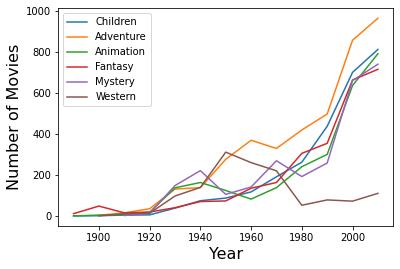

In [285]:
df1 = pd.DataFrame({'Children': children_data,
                   
                   'Adventure': adventure_data,
                   'Animation': animation_data,
                   
                   
                   
                   'Fantasy': fantasy_data,
                   
                   
                   'Mystery' : mystery_data,
                   
                   'Western' : western_data,
                   })
df1.plot()
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

Text(0, 0.5, 'Number of Movies')

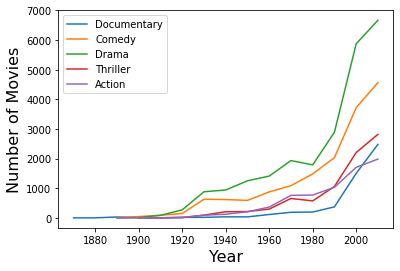

In [284]:
df2 = pd.DataFrame({'Documentary': documentary_data,
                   'Comedy': comedy_data,
                   'Drama': drama_data,
                    'Thriller' : thriller_data,
                    'Action': action_data,
                    
                   })
df2.plot()
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

Text(0, 0.5, 'Number of Movies')

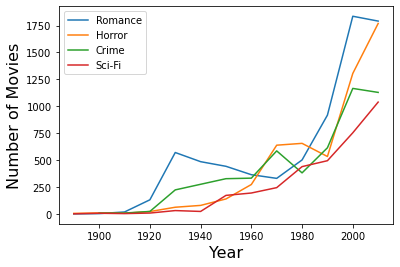

In [283]:
df3 = pd.DataFrame({
                    
                    'Romance' : romance_data,
                    
                    'Horror': horror_data,
                    'Crime': crime_data,
                    'Sci-Fi' : scifi_data,
                    




                   })
df3.plot()
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

Text(0, 0.5, 'Number of Movies')

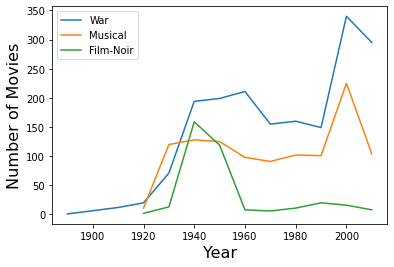

In [282]:
df4 = pd.DataFrame({'War' : war_data,
                    'Musical' : musical_data,
    
                    
                    
                    
                    
                    'Film-Noir': filmnoir_data,
                    
                   




                   })
df4.plot()
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

In [ ]:
# DISCARD later, this is a useless bar plot
plt.bar(range(len(horror_data)), list(horror_data.values()), align='center')
plt.xticks(range(len(horror_data)), list(horror_data.keys()))

In [229]:
from datetime import datetime

In [238]:
decade = [0] * 27753444

for x in range(0,27753444):
  decade[x] = (datetime.fromtimestamp(ratings['timestamp'][x]).year)//10*10


In [240]:
# we replaced timestamp with only the decade
ratings['decade'] = decade;
ratings.drop('timestamp', axis=1, inplace=True)
ratings.head()

userId  movieId  rating  decade
0       1      307     3.5    2000
1       1      481     3.5    2000
2       1     1091     1.5    2000
3       1     1257     4.5    2000
4       1     1449     4.5    2000

In [241]:
ratings_data = {}
for x in range(0, 27753444):
  if not ratings['decade'][x] in ratings_data:
    ratings_data[ratings['decade'][x]] = 1
  else:
    ratings_data[ratings['decade'][x]] += 1
  
ratings_data = collections.OrderedDict(sorted(ratings_data.items()))

print(ratings_data)

OrderedDict([(1990, 4058073), (2000, 12824005), (2010, 10871366)])


([<matplotlib.axis.XTick at 0x7f5f73980550>,
 [Text(0, 0, '1990'), Text(0, 0, '2000'), Text(0, 0, '2010')])

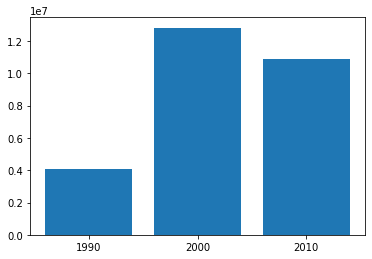

In [247]:
plt.bar(range(len(ratings_data)), list(ratings_data.values()), align='center')
plt.xticks(range(len(ratings_data)), list(ratings_data.keys()))

In [249]:
rating_years = [0] * 27753444

for x in range(0,27753444):
  rating_years[x] = (datetime.fromtimestamp(ratings['timestamp'][x]).year)

In [250]:
ratings['year'] = rating_years;
ratings.head()

userId  movieId  rating   timestamp  year
0       1      307     3.5  1256677221  2009
1       1      481     3.5  1256677456  2009
2       1     1091     1.5  1256677471  2009
3       1     1257     4.5  1256677460  2009
4       1     1449     4.5  1256677264  2009

In [251]:
ratings_data = {}
for x in range(0, 27753444):
  if not ratings['year'][x] in ratings_data:
    ratings_data[ratings['year'][x]] = 1
  else:
    ratings_data[ratings['year'][x]] += 1
  
ratings_data = collections.OrderedDict(sorted(ratings_data.items()))

print(ratings_data)

OrderedDict([(1995, 4), (1996, 1733263), (1997, 763929), (1998, 329704), (1999, 1231173), (2000, 2033738), (2001, 1239432), (2002, 910350), (2003, 1079130), (2004, 1201656), (2005, 1849719), (2006, 1210803), (2007, 1095710), (2008, 1210356), (2009, 993111), (2010, 982104), (2011, 833774), (2012, 792701), (2013, 633573), (2014, 584216), (2015, 1907576), (2016, 2077152), (2017, 1973721), (2018, 1086549)])


Text(0, 0.5, 'Number of Ratings')

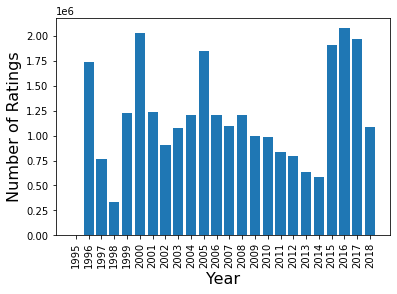

In [279]:

plt.bar(range(len(ratings_data)), list(ratings_data.values()))

plt.xticks(range(len(ratings_data)), list(ratings_data.keys()),rotation='vertical')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Ratings', fontsize=16)


In [303]:
tags=pd.read_csv('/content/drive/MyDrive/ml-latest/tags.csv')
print(tags.values.shape)
tags.head()

(1108997, 4)


userId  movieId           tag   timestamp
0      14      110          epic  1443148538
1      14      110      Medieval  1443148532
2      14      260        sci-fi  1442169410
3      14      260  space action  1442169421
4      14      318  imdb top 250  1442615195

In [304]:
# To analysis the most common tags in each genre, 
# we first catogorize the tags based on the movie genres
# by adding a genres column
# but the tags contains more movies than the movies table (58098 movies in total)
# so make sure its not out of bound
genre = [None] * 1108997
for x in range(0,1108997):
  movieId = tags['movieId'][x]
  if movieId < 58098 + 1:
    genre[x] = movies['genres'][movieId-1] # movieId = index + 1





In [305]:
tags['genre'] = genre

tags = tags.dropna()
tags.head()

userId  movieId           tag   timestamp                 genre
0      14      110          epic  1443148538  Crime|Drama|Thriller
1      14      110      Medieval  1443148532  Crime|Drama|Thriller
2      14      260        sci-fi  1442169410        Children|Drama
3      14      260  space action  1442169421        Children|Drama
4      14      318  imdb top 250  1442615195    Film-Noir|Thriller

In [311]:
action_tags = tags[tags['genre'].str.contains('Action')]
print(action_tags.values.shape)
action_tags.reset_index(drop=True,inplace=True)
action_tags.head()


(87654, 5)


userId  movieId           tag   timestamp                       genre
0      14     1682    philosophy  1442615158   Action|Adventure|Thriller
1      14     1682  surveillance  1442615167   Action|Adventure|Thriller
2      75     4011        comedy  1478382013  Action|Adventure|Drama|War
3      75     4011         Crime  1478381994  Action|Adventure|Drama|War
4      75     4011       cynical  1478382018  Action|Adventure|Drama|War

In [321]:
adventure_tags = tags[tags['genre'].str.contains('Adventure')]
print(adventure_tags.values.shape)
adventure_tags.reset_index(drop=True,inplace=True)
adventure_tags.head()

(61803, 5)


userId  movieId           tag   timestamp                       genre
0      14     1682    philosophy  1442615158   Action|Adventure|Thriller
1      14     1682  surveillance  1442615167   Action|Adventure|Thriller
2      75     4011        comedy  1478382013  Action|Adventure|Drama|War
3      75     4011         Crime  1478381994  Action|Adventure|Drama|War
4      75     4011       cynical  1478382018  Action|Adventure|Drama|War

In [333]:
animation_tags = tags[tags['genre'].str.contains('Animation')]
print(animation_tags.values.shape)
animation_tags.reset_index(drop=True,inplace=True)
animation_tags.head()

(20778, 5)


userId  movieId               tag   timestamp  \
0     268      698            ohsoso  1142156509   
1     268     3342            ohsoso  1137407758   
2     268     8910            ohsoso  1137407540   
3     369     1198         adventure  1466344768   
4     369     1198  Alden Indy Boots  1466344803   

                                         genre  
0  Adventure|Animation|Children|Comedy|Musical  
1                             Animation|Comedy  
2          Adventure|Animation|Children|Comedy  
3   Adventure|Animation|Children|Comedy|Sci-Fi  
4   Adventure|Animation|Children|Comedy|Sci-Fi

In [336]:
children_tags = tags[tags['genre'].str.contains('Children')]
print(children_tags.values.shape)
children_tags.reset_index(drop=True,inplace=True)
children_tags.head()

(43678, 5)


userId  movieId             tag   timestamp           genre
0      14      260          sci-fi  1442169410  Children|Drama
1      14      260    space action  1442169421  Children|Drama
2      27      260  classic sci-fi  1440448113  Children|Drama
3      27      260   Harrison Ford  1440448123  Children|Drama
4      27      260        must see  1440448132  Children|Drama

In [341]:
comedy_tags = tags[tags['genre'].str.contains('Comedy')]
print(comedy_tags.values.shape)
comedy_tags.reset_index(drop=True,inplace=True)
comedy_tags.head()

(200065, 5)


userId  movieId               tag   timestamp                  genre
0      14      593    psychothriller  1444014286         Comedy|Fantasy
1      56     2028        disturbing  1274837927  Comedy|Crime|Thriller
2      56     2028           history  1274837934  Comedy|Crime|Thriller
3      56     2028  Steven Spielberg  1274837939  Comedy|Crime|Thriller
4      56     2966          brothers  1301301874           Comedy|Drama

In [346]:
crime_tags = tags[tags['genre'].str.contains('Crime')]
print(crime_tags.values.shape)
crime_tags.reset_index(drop=True,inplace=True)
crime_tags.head()

(71339, 5)


userId  movieId               tag   timestamp                  genre
0      14      110              epic  1443148538   Crime|Drama|Thriller
1      14      110          Medieval  1443148532   Crime|Drama|Thriller
2      56     2028        disturbing  1274837927  Comedy|Crime|Thriller
3      56     2028           history  1274837934  Comedy|Crime|Thriller
4      56     2028  Steven Spielberg  1274837939  Comedy|Crime|Thriller

In [351]:
documentary_tags = tags[tags['genre'].str.contains('Documentary')]
print(documentary_tags.values.shape)
documentary_tags.reset_index(drop=True,inplace=True)
documentary_tags.head()

(33167, 5)


userId  movieId             tag   timestamp        genre
0      75     1089  great dialogue  1478382781  Documentary
1      75     1089        humorous  1478382746  Documentary
2      75     1089        stylized  1478382743  Documentary
3      75     1089        thriller  1478382766  Documentary
4     268     6234          ohsoso  1137407801  Documentary

In [355]:
drama_tags = tags[tags['genre'].str.contains('Drama')]
print(drama_tags.values.shape)
drama_tags.reset_index(drop=True,inplace=True)
drama_tags.head()

(282856, 5)


userId  movieId           tag   timestamp                 genre
0      14      110          epic  1443148538  Crime|Drama|Thriller
1      14      110      Medieval  1443148532  Crime|Drama|Thriller
2      14      260        sci-fi  1442169410        Children|Drama
3      14      260  space action  1442169421        Children|Drama
4      14      480     Dinosaurs  1443148563                 Drama

In [358]:
fantasy_tags = tags[tags['genre'].str.contains('Fantasy')]
print(fantasy_tags.values.shape)
fantasy_tags.reset_index(drop=True,inplace=True)
fantasy_tags.head()

(36261, 5)


userId  movieId                    tag   timestamp  \
0      14      593         psychothriller  1444014286   
1      75     5445            bad effects  1507437853   
2      75     5445             blury shot  1507437799   
3      75     5445  heavy post-processing  1507437828   
4      88     8340    seen more than once  1209210577   

                              genre  
0                    Comedy|Fantasy  
1  Action|Adventure|Fantasy|Romance  
2  Action|Adventure|Fantasy|Romance  
3  Action|Adventure|Fantasy|Romance  
4                    Fantasy|Horror

In [361]:
filmnoir_tags = tags[tags['genre'].str.contains('Film-Noir')]
print(filmnoir_tags.values.shape)
filmnoir_tags.reset_index(drop=True,inplace=True)
filmnoir_tags.head()

(10176, 5)


userId  movieId           tag   timestamp                     genre
0      14      318  imdb top 250  1442615195        Film-Noir|Thriller
1      14      318       justice  1442615192        Film-Noir|Thriller
2     157      318    story line  1307168810        Film-Noir|Thriller
3     268     1246        ohsoso  1137407713    Comedy|Drama|Film-Noir
4     449     1221        boring  1535759771  Crime|Film-Noir|Thriller

In [364]:
horror_tags = tags[tags['genre'].str.contains('Horror')]
print(horror_tags.values.shape)
horror_tags.reset_index(drop=True,inplace=True)
horror_tags.head()

(57669, 5)


userId  movieId                  tag   timestamp  \
0      88     1084              classic  1209210639   
1      88     3681      Ennio Morricone  1209210547   
2      88     8340  seen more than once  1209210577   
3     116     2571              the one  1444160245   
4     147     1234               Slashy  1173229222   

                          genre  
0                        Horror  
1        Horror|Sci-Fi|Thriller  
2                Fantasy|Horror  
3                        Horror  
4  Action|Comedy|Fantasy|Horror

In [368]:
musical_tags = tags[tags['genre'].str.contains('Musical')]
print(musical_tags.values.shape)
musical_tags.reset_index(drop=True,inplace=True)
musical_tags.head()

(18005, 5)


userId  movieId                tag   timestamp  \
0     147     2006             Slashy  1173230655   
1     268      698             ohsoso  1142156509   
2     340     3114              Pixar  1432245631   
3     449     1270     attempted rape  1506621363   
4     449     1270  incestual content  1506621242   

                                         genre  
0                     Adventure|Comedy|Musical  
1  Adventure|Animation|Children|Comedy|Musical  
2                 Comedy|Drama|Musical|Romance  
3                                Drama|Musical  
4                                Drama|Musical

In [371]:
mystery_tags = tags[tags['genre'].str.contains('Mystery')]
print(mystery_tags.values.shape)
mystery_tags.reset_index(drop=True,inplace=True)
mystery_tags.head()

(39350, 5)


userId  movieId               tag   timestamp          genre
0      75    56174          dystopia  1478381863  Drama|Mystery
1      75    56174        loneliness  1478381876  Drama|Mystery
2      75    56174  post-apocalyptic  1478381868  Drama|Mystery
3      75    56174            sci-fi  1478381866  Drama|Mystery
4      75    56174          survival  1478381873  Drama|Mystery

In [374]:
romance_tags = tags[tags['genre'].str.contains('Romance')]
print(romance_tags.values.shape)
romance_tags.reset_index(drop=True,inplace=True)
romance_tags.head()

(101720, 5)


userId  movieId                             tag   timestamp  \
0      56     8950                  Christian Bale  1300694695   
1      56     8950                imaginary friend  1300694726   
2      56     8950                       Overrated  1300694702   
3      56     8950  post-traumatic stress disorder  1300694710   
4      75      608                    black comedy  1478382579   

                  genre  
0  Comedy|Drama|Romance  
1  Comedy|Drama|Romance  
2  Comedy|Drama|Romance  
3  Comedy|Drama|Romance  
4         Drama|Romance

In [378]:
scifi_tags = tags[tags['genre'].str.contains('Sci-Fi')]
print(scifi_tags.values.shape)
scifi_tags.reset_index(drop=True,inplace=True)
scifi_tags.head()

(41657, 5)


userId  movieId              tag   timestamp                   genre
0      88     3681  Ennio Morricone  1209210547  Horror|Sci-Fi|Thriller
1     116     8873      Che Guevara  1444160066   Action|Mystery|Sci-Fi
2     116     8873        road trip  1444160077   Action|Mystery|Sci-Fi
3     151     5806             Iran  1439803851  Action|Sci-Fi|Thriller
4     151     5806          Persian  1439803857  Action|Sci-Fi|Thriller

In [381]:
thriller_tags = tags[tags['genre'].str.contains('Thriller')]
print(thriller_tags.values.shape)
thriller_tags.reset_index(drop=True,inplace=True)
thriller_tags.head()

(103127, 5)


userId  movieId           tag   timestamp                      genre
0      14      110          epic  1443148538       Crime|Drama|Thriller
1      14      110      Medieval  1443148532       Crime|Drama|Thriller
2      14      318  imdb top 250  1442615195         Film-Noir|Thriller
3      14      318       justice  1442615192         Film-Noir|Thriller
4      14     1682    philosophy  1442615158  Action|Adventure|Thriller

In [384]:
war_tags = tags[tags['genre'].str.contains('War')]
print(war_tags.values.shape)
war_tags.reset_index(drop=True,inplace=True)
war_tags.head()

(24049, 5)


userId  movieId           tag   timestamp                       genre
0      56     4873   metaphysics  1300693593                   Drama|War
1      56     4873  no narrative  1300693602                   Drama|War
2      75     4011        comedy  1478382013  Action|Adventure|Drama|War
3      75     4011         Crime  1478381994  Action|Adventure|Drama|War
4      75     4011       cynical  1478382018  Action|Adventure|Drama|War

In [387]:
western_tags = tags[tags['genre'].str.contains('Western')]
print(western_tags.values.shape)
western_tags.reset_index(drop=True,inplace=True)
western_tags.head()

(17654, 5)


userId  movieId                      tag   timestamp  \
0      75     8636                superhero  1478381532   
1      75     8644  artificial intelligence  1478382700   
2      75     8644                 dystopia  1478382709   
3      75     8644                   sci-fi  1478382703   
4     268     3535                   ohsoso  1137407582   

                             genre  
0                   Comedy|Western  
1                          Western  
2                          Western  
3                          Western  
4  Action|Adventure|Comedy|Western

In [388]:
western_data = {}
for x in range(0, 17654):
  if not western_tags['tag'][x] in western_data:
    western_data[western_tags['tag'][x]] = 1
  else:
    western_data[western_tags['tag'][x]] += 1

print(western_data)

{'superhero': 46, 'artificial intelligence': 84, 'dystopia': 54, 'sci-fi': 131, 'ohsoso': 1, 'space': 24, 'backwards': 15, 'memory': 114, 'memory loss': 32, 'nonlinear': 263, 'reverse timeline': 11, 'short-term memory loss': 28, 'black comedy': 14, 'dark': 91, 'dark comedy': 86, 'dark humor': 30, 'Todd Solondz': 7, 'psychological': 156, 'complicated': 104, 'dreamlike': 75, 'twist ending': 284, 'the best movie ever made': 1, 'dystopi': 2, 'amnesia': 43, 'mindfuck': 7, 'mystery': 109, 'psychology': 213, 'casino': 39, 'con artists': 8, 'con men': 27, 'crime': 55, 'heist': 110, 'las vegas': 19, 'plot twist': 101, 'thriller': 22, 'Bruce Lee': 5, 'Brucesploitation': 1, 'exploitation': 1, 'unintentional comedy': 1, 'Bechdel Test:Fail': 17, 'Brad Pitt': 57, 'George Clooney': 55, 'Julia Roberts': 28, 'Matt Damon': 94, 'witty': 58, 'Amber Valletta': 1, 'Eva Mendes': 16, 'Kevin James': 15, 'Will Smith': 92, 'figure skating': 16, 'ice skating': 10, 'Jon Heder': 7, 'Will Ferrell': 18, "god hand's k

In [385]:
war_data = {}
for x in range(0, 24049):
  if not war_tags['tag'][x] in war_data:
    war_data[war_tags['tag'][x]] = 1
  else:
    war_data[war_tags['tag'][x]] += 1

print(war_data)

{'metaphysics': 35, 'no narrative': 7, 'comedy': 174, 'Crime': 32, 'cynical': 60, 'Great dialogue': 56, 'guy ritchie': 32, 'Hilarious': 29, 'dystopia': 142, 'ohsoso': 2, 'guy ritchie film  english humor': 2, 'Alfred Hitchcock': 91, 'beautiful': 23, 'crying': 3, 'Accidental Murder': 2, 'Boot Camp Episode': 2, 'Chucky': 5, 'Hero with Bad Publicity': 2, 'Military School': 2, 'No OSHA Compliance': 2, 'sequel': 40, 'heartwarming': 65, 'stylized': 170, 'surreal': 216, 'whimsical': 63, 'Al Pacino': 17, 'Russell Crowe': 16, 'amazing photography': 33, 'Epic': 20, 'martial arts': 70, 'visual appealing': 2, 'assassination': 9, 'conspiracy': 13, 'corruption': 29, 'espionage': 31, 'hackers': 15, 'internet': 5, 'nsa': 5, 'social criticism': 7, 'spying': 6, 'surveillance': 25, 'thriller': 84, 'wrongly accused': 8, 'assassin': 37, 'female assassin': 5, 'nudity': 9, 'rape': 29, 'gunfight': 8, 'ridiculous': 11, 'satire': 131, 'silly': 7, 'ultra-violence': 9, 'Gregory Peck': 23, 'bad ending': 4, 'post-ap

In [382]:
thriller_data = {}
for x in range(0, 103127):
  if not thriller_tags['tag'][x] in thriller_data:
    thriller_data[thriller_tags['tag'][x]] = 1
  else:
    thriller_data[thriller_tags['tag'][x]] += 1

print(thriller_data)

{'epic': 38, 'Medieval': 28, 'imdb top 250': 324, 'justice': 80, 'philosophy': 287, 'surveillance': 67, 'disturbing': 512, 'history': 112, 'Steven Spielberg': 108, 'black comedy': 194, 'love story': 29, 'post-apocalyptic': 422, 'crime': 313, 'intelligent': 123, 'Leonardo DiCaprio': 81, 'smart': 57, 'twists & turns': 143, 'sci-fi': 649, 'survival': 73, 'gangster': 47, 'Ennio Morricone': 23, 'trippy': 8, 'Tom Hanks': 204, 'war': 298, 'Slashy': 3, 'Caper': 4, 'Iran': 2, 'Persian': 1, 'Samira Makhmalbaf': 3, 'story line': 3, 'actions': 1, 'ChowYoungFat': 1, 'Kung Fu': 33, 'sword fighting': 15, '80s': 17, 'Old Timey Sets': 1, 'ohsoso': 9, 'jack nicholson': 46, 'Brad Pitt': 328, 'true story': 232, 'romance': 305, 'british english': 1, 'boring': 135, 'Mafia': 39, 'New York Mafia': 2, 'Oscar (Best Picture)': 188, 'slow': 76, 'cult clasic': 4, 'Nudity (Topless - Brief)': 84, 'Painful Transformation': 1, 'The Florence Nightingale Effect': 1, 'werewolf': 71, 'werewolves': 94, 'Alone with the Psyc

In [379]:
scifi_data = {}
for x in range(0, 41657):
  if not scifi_tags['tag'][x] in scifi_data:
    scifi_data[scifi_tags['tag'][x]] = 1
  else:
    scifi_data[scifi_tags['tag'][x]] += 1

print(scifi_data)

{'Ennio Morricone': 25, 'Che Guevara': 19, 'road trip': 95, 'Iran': 1, 'Persian': 1, 'Samira Makhmalbaf': 2, 'USSR': 2, 'ohsoso': 8, 'funny': 197, 'Pixar': 88, 'adventure': 260, 'Alden Indy Boots': 1, 'archaeology': 94, 'boring': 57, 'cute': 44, 'romantic comedy': 64, 'crime': 54, 'dark comedy': 225, 'disturbing': 181, 'gangsters': 35, 'mafia': 114, 'Martin Scorsese': 141, 'masterpiece': 67, 'organized crime': 119, 'violence': 177, 'violent': 130, 'satire': 161, 'Trey Parker': 19, 'thought provoking': 29, 'auckland': 3, 'Excellent use of dialogue': 55, 'thought-provoking': 109, 'Alaska': 39, 'atmospheric': 368, 'self discovery': 92, 'excellent script': 24, 'surreal drama': 1, 'drew': 1, 'svart humor': 1, 'Bees': 4, 'dreamlike': 146, 'ghetto': 2, 'Grimy': 2, 'haphazard themes': 1, 'housing project': 2, 'insanity': 12, 'mirrors': 2, 'murder': 97, 'Nudity (Topless)': 96, 'research': 2, 'serial killer': 47, 'slasher': 29, 'slum': 5, 'university': 6, 'urban decay': 2, 'urban legend': 8, 'ur

In [375]:
romance_data = {}
for x in range(0, 101720):
  if not romance_tags['tag'][x] in romance_data:
    romance_data[romance_tags['tag'][x]] = 1
  else:
    romance_data[romance_tags['tag'][x]] += 1

print(romance_data)

{'Christian Bale': 73, 'imaginary friend': 43, 'Overrated': 27, 'post-traumatic stress disorder': 10, 'black comedy': 475, 'dark comedy': 753, 'bad effects': 4, 'blury shot': 1, 'heavy post-processing': 1, 'tom hanks': 160, 'Slashy': 4, 'Caper': 5, 'actions': 1, 'ChowYoungFat': 1, 'Kung Fu': 32, 'sword fighting': 10, '80s': 14, 'ohsoso': 8, 'Brad Pitt': 202, 'Jude Law': 30, 'Pixar': 86, 'pixar': 90, 'Alfred Hitchcock': 156, 'history': 132, 'soundtrack': 103, 'southern': 3, 'acting': 48, 'scored': 1, 'romance': 372, 'singing': 12, 'animation': 237, 'imagination': 183, 'inspirational': 244, 'boring': 143, 'Charles Bronson': 12, 'slow': 135, 'sequel': 140, 'classic': 772, 'classic horror': 8, 'frankenstein': 9, 'horror classic': 5, 'Dark Comedy': 6, 'fantasy': 460, 'immortality': 29, 'Meryl Streep': 12, 'clever script': 5, 'crisis counselor': 1, 'ptsd': 1, 'serial killer': 182, 'slasher': 93, 'whodunnit': 6, 'Adult Fear': 1, 'Ascended Fanboy': 1, 'Atypical superhero': 3, 'comics': 19, 'cr

In [372]:
mystery_data = {}
for x in range(0, 39350):
  if not mystery_tags['tag'][x] in mystery_data:
    mystery_data[mystery_tags['tag'][x]] = 1
  else:
    mystery_data[mystery_tags['tag'][x]] += 1

print(mystery_data)

{'dystopia': 400, 'loneliness': 30, 'post-apocalyptic': 279, 'sci-fi': 477, 'survival': 58, 'Che Guevara': 19, 'road trip': 32, 'ohsoso': 3, 'Brad Pitt': 312, 'romance boygirl dancing': 2, 'cult clasic': 4, 'Nudity (Topless - Brief)': 31, 'Painful Transformation': 1, 'The Florence Nightingale Effect': 1, 'werewolf': 37, 'werewolves': 29, 'Adult Fear': 1, 'Ascended Fanboy': 1, 'Atypical superhero': 3, 'comics': 17, 'crap ending': 4, 'father-son relationship': 20, 'm. night shyamalan': 7, 'superhero': 38, 'dark comedy': 255, 'mindfuck': 227, 'satirical': 96, 'violence': 314, 'violent': 197, 'Rob Zombie': 13, 'cannibalism': 16, 'gore': 49, 'mutation': 13, 'rape': 53, 'torture porn': 7, 'anime': 88, 'atmospheric': 640, 'friendship': 61, 'Great Soundtrack': 34, 'quirky': 201, 'quirky romantic': 29, 'AFI 100 (Laughs)': 9, 'AFI 100 (Movie Quotes)': 15, 'classic': 250, 'comedy': 172, 'farce': 12, 'Leslie Nielsen': 23, 'Parody': 36, 'twist': 52, 'genetic selection': 29, 'helena bonham carter': 

In [369]:
musical_data = {}
for x in range(0, 18005):
  if not musical_tags['tag'][x] in musical_data:
    musical_data[musical_tags['tag'][x]] = 1
  else:
    musical_data[musical_tags['tag'][x]] += 1

print(musical_data)

{'Slashy': 2, 'ohsoso': 1, 'Pixar': 72, 'attempted rape': 2, 'incestual content': 3, 'mother-son relationship': 7, 'time travel': 306, 'coming of age': 27, 'feel-good': 69, 'inspirational': 95, 'Robin Williams': 118, 'Black Humor At Its Best': 1, 'get': 4, 'dated': 7, 'james bond': 21, 'misogynist': 3, 'German expressionism': 8, 'based on a book': 125, 'dystopia': 89, 'island': 22, 'Japan': 34, 'classic': 218, 'drama': 33, 'GREAT MOVIE': 1, 'ROMCOM': 1, 'United States': 1, 'boring start': 3, 'fantastic end': 2, 'words cannot explain how horrid this is': 2, 'great acting': 44, 'Matt Damon': 98, 'Arnold Schwarzenegger': 82, 'future': 86, 'Oscar (Best Effects - Visual Effects)': 7, 'sci-fi': 207, 'bad school': 1, 'turn around': 1, 'Greg Kinnear': 4, 'Nudity (Full Frontal)': 2, 'genius': 88, 'psychology': 190, 'twist ending': 112, 'american idiocy': 18, 'documentary': 38, 'flawed experiment': 4, 'inaccurate': 5, 'social criticism': 15, 'social message': 12, 'David Bowie': 28, 'fairy tales'

In [365]:
horror_data = {}
for x in range(0, 57669):
  if not horror_tags['tag'][x] in horror_data:
    horror_data[horror_tags['tag'][x]] = 1
  else:
    horror_data[horror_tags['tag'][x]] += 1

print(horror_data)

{'classic': 217, 'Ennio Morricone': 31, 'seen more than once': 61, 'the one': 1, 'Slashy': 4, '80s': 15, 'Old Timey Sets': 1, 'ohsoso': 4, 'history': 71, 'cult clasic': 4, 'Nudity (Topless - Brief)': 52, 'Painful Transformation': 1, 'The Florence Nightingale Effect': 1, 'werewolf': 25, 'werewolves': 26, 'action': 293, 'alternate reality': 250, 'alternate world': 16, 'cult film': 215, 'cyberpunk': 169, 'dystopic future': 23, 'Futuristic': 29, 'Keanu Reeves': 107, 'martial arts': 180, 'overrated': 60, 'philosophical': 286, 'philosophy': 185, 'post apocalyptic': 91, 'post-apocalyptic': 244, 'pretentious': 25, 'stylized': 238, 'surreal': 420, 'Oded Fehr': 4, 'adult humor': 31, 'controversial': 43, 'crude humor': 26, 'free speech': 19, 'funny': 231, 'satire': 120, 'satirical': 47, 'south park': 15, 'Trey Parker': 13, 'War': 23, 'atmospheric': 588, 'multiple storylines': 48, 'thought-provoking': 333, 'visually appealing': 156, 'Excellent use of dialogue': 55, 'cinematography': 74, 'dreamlike

In [362]:
filmnoir_data = {}
for x in range(0, 10176):
  if not filmnoir_tags['tag'][x] in filmnoir_data:
    filmnoir_data[filmnoir_tags['tag'][x]] = 1
  else:
    filmnoir_data[filmnoir_tags['tag'][x]] += 1

print(filmnoir_data)

{'imdb top 250': 74, 'justice': 76, 'story line': 3, 'ohsoso': 1, 'boring': 4, 'Mafia': 30, 'New York Mafia': 2, 'Oscar (Best Picture)': 55, 'slow': 10, "All Hallows' Eve": 1, 'Body Horror': 1, 'Evil, Inc.': 1, 'halloween': 13, 'Jingle': 2, 'masks': 2, 'Murderous Mask': 1, 'Oddball in the Series': 1, 'technology': 2, 'Alien Invasion': 2, 'aliens': 15, 'Aliens in Cardiff': 2, 'Assimilation Plot': 2, 'body horror': 4, 'body snatcher': 5, 'Breakfast Club': 2, 'Brilliant, but Lazy': 3, 'creature feature': 4, 'Dwindling Party': 2, 'Evil Teacher': 2, 'funny': 18, 'high school': 30, 'horror': 18, 'losers': 3, 'Nudity (Topless - Brief)': 12, 'Nudity (Topless)': 21, 'parasite': 3, 'sci-fi': 8, 'teen': 25, 'teen nudity': 3, 'hope': 80, 'inspirational': 250, 'prison': 206, 'prison escape': 195, 'claustrophobic': 28, 'long': 15, 'submarine': 41, 'too long': 15, 'war': 18, 'World War II': 44, 'WWII': 13, 'Fucking Digimon': 2, 'based on a book': 88, 'friendship': 185, 'Justice': 2, 'United States': 

In [359]:
fantasy_data = {}
for x in range(0, 36261):
  if not fantasy_tags['tag'][x] in fantasy_data:
    fantasy_data[fantasy_tags['tag'][x]] = 1
  else:
    fantasy_data[fantasy_tags['tag'][x]] += 1

print(fantasy_data)

{'psychothriller': 56, 'bad effects': 6, 'blury shot': 1, 'heavy post-processing': 1, 'seen more than once': 40, 'Slashy': 6, 'USSR': 1, 'brilliant': 6, 'exploratory': 1, 'ligne de fuite': 1, 'funny': 179, 'Pixar': 152, 'acting': 21, 'history': 7, 'scored': 1, 'clever script': 3, 'crisis counselor': 1, 'ptsd': 1, 'serial killer': 257, 'slasher': 38, 'whodunnit': 3, 'beer': 5, 'Christopher Mintz Plasse': 2, 'Christopher Mintz-Plasse': 6, 'crude': 10, 'crude humor': 48, 'drinking': 12, 'Jonah Hill': 12, 'Michael Cera': 45, 'nerds': 21, 'No story line': 2, 'party': 13, 'pornography': 15, 'Seth Rogen': 42, 'virginity': 17, 'Oded Fehr': 4, 'satire': 85, 'Trey Parker': 16, 'fantasy thriller': 2, 'black comedy': 84, 'svart humor': 1, 'animated': 43, 'buddy movie': 10, 'Cartoon': 11, 'cgi': 10, 'comedy': 249, 'computer animation': 39, 'family': 45, 'friendship': 92, 'kids': 11, 'toy': 7, 'toys': 28, 'aliens': 205, 'atmospheric': 360, 'creepy': 40, 'horror': 161, 'mystery': 71, 'sci-fi': 565, '

In [356]:
drama_data = {}
for x in range(0, 282856):
  if not drama_tags['tag'][x] in drama_data:
    drama_data[drama_tags['tag'][x]] = 1
  else:
    drama_data[drama_tags['tag'][x]] += 1

print(drama_data)

{'epic': 336, 'Medieval': 28, 'sci-fi': 3261, 'space action': 173, 'Dinosaurs': 44, 'Epic': 120, 'classic sci-fi': 375, 'Harrison Ford': 350, 'must see': 100, 'cliche': 68, 'brothers': 62, 'David Lynch': 104, 'lawn mower': 22, 'melodrama': 24, 'obstinance': 5, 'metaphysics': 39, 'no narrative': 7, 'Christian Bale': 84, 'imaginary friend': 44, 'Overrated': 57, 'post-traumatic stress disorder': 25, 'black comedy': 786, 'dark comedy': 1464, 'parody': 462, 'stupid': 336, 'comedy': 1936, 'Crime': 140, 'cynical': 189, 'Great dialogue': 56, 'guy ritchie': 32, 'Hilarious': 31, 'isolation': 47, 'loneliness': 278, 'man vs. nature': 41, 'psychological': 447, 'stranded': 135, 'SURVIVAL': 49, 'dystopia': 1163, 'crime': 608, 'intelligent': 223, 'Leonardo DiCaprio': 279, 'smart': 62, 'twists & turns': 155, 'atmospheric': 1917, 'complicated plot': 112, 'gangsters': 247, 'psychology': 1080, 'undercover cop': 111, 'post-apocalyptic': 529, 'survival': 201, 'trippy': 10, 'disturbing': 849, 'Martin Scorses

In [352]:
documentary_data = {}
for x in range(0, 33167):
  if not documentary_tags['tag'][x] in documentary_data:
    documentary_data[documentary_tags['tag'][x]] = 1
  else:
    documentary_data[documentary_tags['tag'][x]] += 1

print(documentary_data)

{'great dialogue': 17, 'humorous': 62, 'stylized': 158, 'thriller': 112, 'ohsoso': 1, 'deathray': 3, 'Bitter Wedding Speech': 1, 'chick flick': 33, 'Humiliation Conga': 1, 'James Marsden': 9, 'judy greer': 2, 'Bizarre': 15, 'harmony korine': 5, 'lots of blood': 7, 'violence': 77, 'violent': 63, 'based on a true story': 150, 'courage': 30, 'inspirational': 55, 'coming of age': 131, 'get': 5, 'aviation': 37, 'fighter jet planes': 6, 'Mark Wahlberg': 18, 'sniper': 30, 'action': 155, 'bad plot': 10, 'dragons': 3, 'end of war': 3, 'in the bunker': 1, 'dystopia': 112, 'surreal': 417, 'alien invasion': 33, 'aliens': 131, 'apocalypse': 3, 'based on a book': 156, 'end of the world': 3, 'father daughter relationship': 18, 'sci-fi': 304, 'single father': 22, 'Survival': 4, '23': 1, 'amnesia': 79, 'conspiracy theory': 26, 'memory loss': 16, 'mental illness': 20, 'mystery': 84, 'obsession': 61, 'plot twist': 16, 'Sexualized violence': 12, 'twist ending': 96, 'atmospheric': 177, 'bad antagonist': 1,

In [347]:
crime_data = {}
for x in range(0, 71339):
  if not crime_tags['tag'][x] in crime_data:
    crime_data[crime_tags['tag'][x]] = 1
  else:
    crime_data[crime_tags['tag'][x]] += 1

print(crime_data)

{'epic': 41, 'Medieval': 28, 'disturbing': 284, 'history': 143, 'Steven Spielberg': 131, 'parody': 134, 'stupid': 61, 'crime': 129, 'intelligent': 157, 'Leonardo DiCaprio': 81, 'smart': 44, 'twists & turns': 179, 'post-apocalyptic': 220, 'sci-fi': 874, 'survival': 68, 'atmospheric': 603, 'Christian Bale': 129, 'complicated': 169, 'mystery': 154, 'nonlinear': 127, 'psychological': 175, 'twist ending': 593, 'trippy': 9, 'Tom Hanks': 204, 'war': 296, '80s': 21, 'ohsoso': 7, 'jack nicholson': 46, 'true story': 174, 'romance boygirl dancing': 2, 'british english': 1, 'boring': 101, 'Mafia': 54, 'New York Mafia': 2, 'Oscar (Best Picture)': 136, 'slow': 73, 'sequel': 124, 'Alien Invasion': 2, 'aliens': 272, 'Aliens in Cardiff': 2, 'Assimilation Plot': 2, 'body horror': 14, 'body snatcher': 5, 'Breakfast Club': 2, 'Brilliant, but Lazy': 3, 'creature feature': 13, 'Dwindling Party': 2, 'Evil Teacher': 2, 'funny': 224, 'high school': 104, 'horror': 207, 'losers': 4, 'Nudity (Topless - Brief)': 6

In [342]:
comedy_data = {}
for x in range(0, 200065):
  if not comedy_tags['tag'][x] in comedy_data:
    comedy_data[comedy_tags['tag'][x]] = 1
  else:
    comedy_data[comedy_tags['tag'][x]] += 1

print(comedy_data)

{'psychothriller': 57, 'disturbing': 912, 'history': 310, 'Steven Spielberg': 164, 'brothers': 36, 'David Lynch': 49, 'lawn mower': 21, 'melodrama': 27, 'obstinance': 5, 'Christian Bale': 180, 'imaginary friend': 53, 'Overrated': 34, 'post-traumatic stress disorder': 26, 'black comedy': 570, 'love story': 197, 'post-apocalyptic': 113, 'parody': 313, 'stupid': 245, 'superhero': 493, 'atmospheric': 1560, 'complicated plot': 103, 'gangsters': 104, 'psychology': 1347, 'undercover cop': 87, 'Martin Scorsese': 229, 'tom hanks': 185, 'Tom Hanks': 474, 'war': 435, 'Slashy': 13, 'Caper': 5, 'Heist': 22, 'queer': 88, 'fairy tale': 274, 'Funny': 105, 'Kids': 1, '80s': 43, 'Old Timey Sets': 2, 'Nudity (Topless - Brief)': 144, 'ohsoso': 25, 'Jude Law': 54, 'real blues': 1, 'brilliant': 17, 'exploratory': 1, 'ligne de fuite': 1, 'Pixar': 462, 'Stephen King': 171, 'funny': 990, 'Russell Crowe': 205, 'twist ending': 925, 'pixar': 170, 'adventure': 510, 'Alden Indy Boots': 1, 'archaeology': 89, 'soundt

In [337]:
children_data = {}
for x in range(0, 43678):
  if not children_tags['tag'][x] in children_data:
    children_data[children_tags['tag'][x]] = 1
  else:
    children_data[children_tags['tag'][x]] += 1

print(children_data)

{'sci-fi': 1303, 'space action': 173, 'classic sci-fi': 375, 'Harrison Ford': 226, 'must see': 45, 'Class sci-fi': 1, 'Mystical space epic': 1, 'Caper': 2, 'Heist': 1, 'Slashy': 2, 'queer': 13, 'space adventure': 401, 'ohsoso': 4, 'good vs evil': 175, 'oldie but goodie': 59, 'Science Fiction': 475, 'Meg Ryan': 10, 'espionage': 113, 'Matt Damon': 51, 'twist ending': 307, 'orca': 1, 'epic adventure': 83, 'adventure': 411, 'Alden Indy Boots': 1, 'archaeology': 61, 'good versus evil': 67, 'biblical': 27, 'Catholicism': 16, 'Christianity': 24, 'creepy': 26, 'demons': 16, 'exorcism': 25, 'Gross': 2, 'paranormal': 26, 'possession': 32, 'priest': 10, 'projectile vomit': 4, 'puke': 4, 'religion': 67, 'dinosaurs': 29, 'jedi': 75, 'space epic': 130, 'satire': 139, 'Trey Parker': 25, 'anti-Semitism': 16, 'controversial': 52, 'crude humor': 65, 'prostitution': 20, 'racism': 40, 'space': 445, 'trilogy': 14, 'school drama': 37, 'slow': 25, 'great cinematography': 7, 'racist rubbish': 1, 'animated': 2

In [326]:
import operator

action_data = {}
for x in range(0, 87654):
  if not action_tags['tag'][x] in action_data:
    action_data[action_tags['tag'][x]] = 1
  else:
    action_data[action_tags['tag'][x]] += 1
#dict(sorted(action_data.items(), key=lambda item: item[1]))
action_data = sorted(action_data.items(), key=operator.itemgetter(1))

print(action_data)

[('blury shot', 1), ('heavy post-processing', 1), ('Slashy', 1), ('Persian', 1), ('Alone with the Psycho', 1), ('Adult Fear', 1), ('Ascended Fanboy', 1), ('the best movie ever made', 1), ('Sad but true ;)', 1), ('senseless', 1), ('haphazard themes', 1), ('urban myth', 1), ('brokers', 1), ('Garry Kasparov', 1), ('Amber Valletta', 1), ('wolverine', 1), ('DENIRO is outstanding', 1), ('boooooooooooring', 1), ('ancestors', 1), ('heritage', 1), ('simple living', 1), ('wisdom', 1), ('contrasting lifestyles', 1), ('liberal vs. uptight conservative', 1), ('absurd conflict', 1), ('clash of interests', 1), ('Black swan event', 1), ('movie making', 1), ('doomed love affair', 1), ('Djimon Hounsou', 1), ('lengthy', 1), ('Lisa Gerrard', 1), ('lucas black', 1), ('human potential', 1), ('real human being & a real hero', 1), ('Aidan Gillen', 1), ('own it', 1), ('Rita Moreno', 1), ('Rupert Everett', 1), ('Jason Isaacs', 1), ('interpretable', 1), ('with a twist', 1), ('Chris Pine', 1), ('Claymation', 1), 

In [331]:
adventure_data = {}
for x in range(0, 61803):
  if not adventure_tags['tag'][x] in adventure_data:
    adventure_data[adventure_tags['tag'][x]] = 1
  else:
    adventure_data[adventure_tags['tag'][x]] += 1
#adventure_data = sorted(adventure_data.items(), key=operator.itemgetter(1))
print(adventure_data)

{'philosophy': 112, 'surveillance': 45, 'comedy': 372, 'Crime': 34, 'cynical': 67, 'Great dialogue': 56, 'guy ritchie': 33, 'Hilarious': 29, 'bad effects': 6, 'blury shot': 1, 'heavy post-processing': 1, 'gangster': 33, 'Caper': 10, 'Slashy': 3, 'Heist': 1, 'ohsoso': 9, 'guy ritchie film  english humor': 2, 'Meg Ryan': 3, 'funny': 350, 'Pixar': 259, 'pixar': 169, 'adventure': 224, 'Alden Indy Boots': 1, 'archaeology': 69, 'romance': 127, 'animation': 350, 'imagination': 101, 'inspirational': 109, 'biblical': 27, 'Catholicism': 16, 'Christianity': 23, 'creepy': 82, 'demons': 22, 'exorcism': 22, 'Gross': 2, 'paranormal': 28, 'possession': 44, 'priest': 7, 'projectile vomit': 4, 'puke': 4, 'religion': 87, 'dinosaurs': 35, '1950s': 37, 'Alone with the Psycho': 1, 'insanity': 96, 'jealousy': 31, 'sisters': 6, 'cute': 66, 'romantic comedy': 61, 'black comedy': 195, 'cult film': 217, 'dark comedy': 518, 'hallucinatory': 30, 'mindfuck': 269, 'original': 51, 'quirky': 278, 'satirical': 72, 'sur

In [334]:
animation_data = {}
for x in range(0, 20778):
  if not animation_tags['tag'][x] in animation_data:
    animation_data[animation_tags['tag'][x]] = 1
  else:
    animation_data[animation_tags['tag'][x]] += 1
print(animation_data)

{'ohsoso': 3, 'adventure': 159, 'Alden Indy Boots': 1, 'archaeology': 66, 'cute': 22, 'romantic comedy': 18, 'dark comedy': 66, 'satire': 109, 'thought provoking': 21, 'anti-Semitism': 15, 'controversial': 37, 'crude humor': 34, 'prostitution': 12, 'racism': 27, 'school drama': 14, 'slow': 16, 'fantasy thriller': 2, 'racist rubbish': 1, 'obnoxious kid': 3, 'Rainn Wilson': 3, 'spoiled brats': 2, 'stupid ending': 3, 'animated': 22, 'buddy movie': 8, 'Cartoon': 12, 'cgi': 11, 'comedy': 151, 'computer animation': 34, 'family': 111, 'friendship': 53, 'kids': 12, 'toy': 7, 'toys': 28, 'dated': 3, 'james bond': 21, 'misogynist': 3, 'German expressionism': 8, "god hand's killer": 2, 'not as good as other rocky films': 1, 'egypt': 2, 'Nazis': 50, 'road trip': 22, 'United States': 3, 'Nudity (Topless - Brief)': 34, 'boring start': 3, 'fantastic end': 2, 'stupid main character': 1, 'Tobey Maguire': 39, 'Criterion': 89, 'Nastassia Kinski': 3, 'Roman Polanski': 6, 'Arnold Schwarzenegger': 133, 'fut

In [ ]:
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

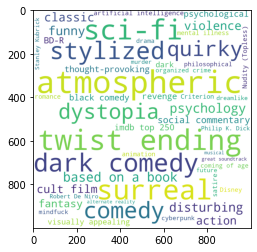

In [320]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(action_data)
plt.imshow(wc)

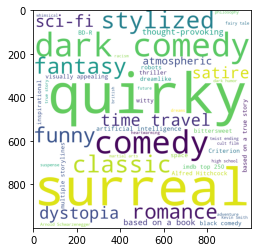

In [386]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(war_data)
plt.imshow(wc)

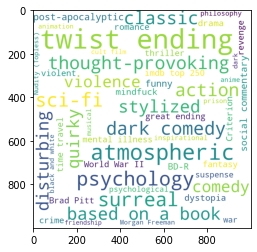

In [383]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(thriller_data)
plt.imshow(wc)

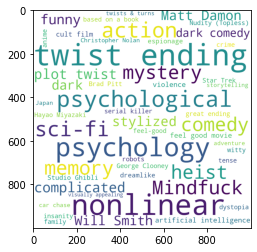

In [389]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(western_data)
plt.imshow(wc)

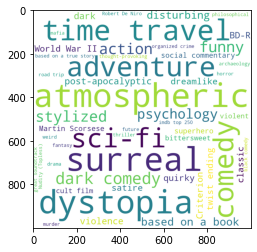

In [380]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(scifi_data)
plt.imshow(wc)

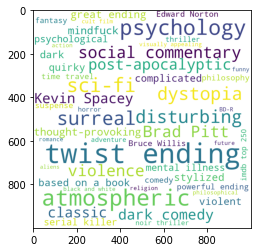

In [373]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(mystery_data)
plt.imshow(wc)

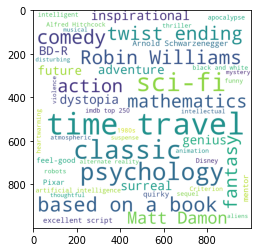

In [370]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(musical_data)
plt.imshow(wc)

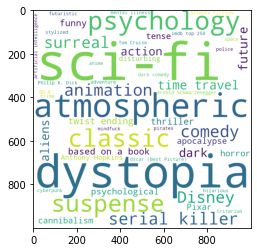

In [360]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(fantasy_data)
plt.imshow(wc)

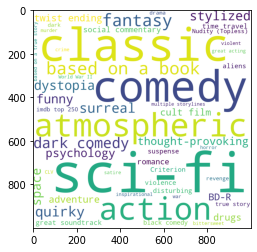

In [357]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(drama_data)
plt.imshow(wc)

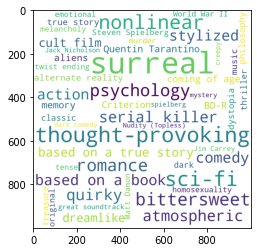

In [354]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(documentary_data)
plt.imshow(wc)

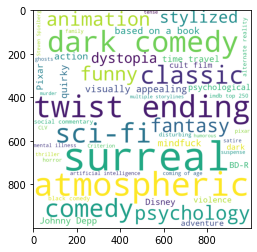

In [332]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(adventure_data)
plt.imshow(wc)

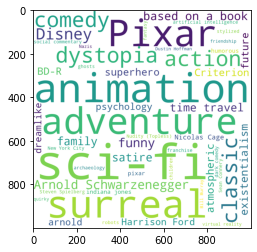

In [335]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(animation_data)
plt.imshow(wc)

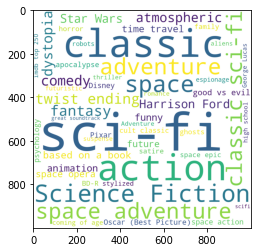

In [340]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(children_data)
plt.imshow(wc)

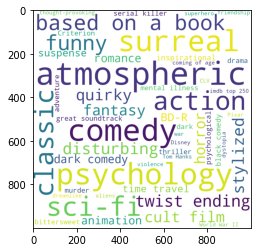

In [345]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(comedy_data)
plt.imshow(wc)

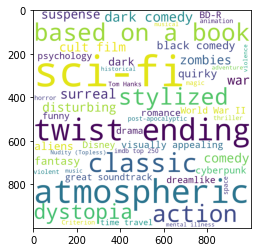

In [349]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(crime_data)
plt.imshow(wc)

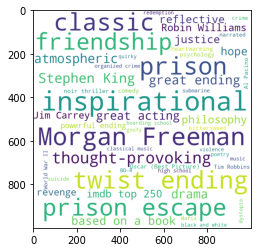

In [363]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(filmnoir_data)
plt.imshow(wc)

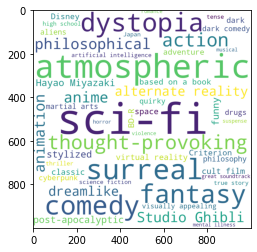

In [367]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(horror_data)
plt.imshow(wc)

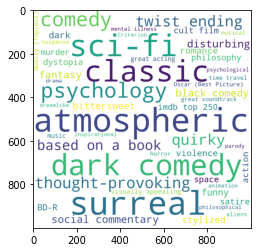

In [392]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(romance_data)
plt.imshow(wc)